In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

task_map = {'Quantity':1,'MeasuredProperty':2,'MeasuredEntity':3,'Qualifier':4, 'Unit':5}

In [2]:
currentdir = os.getcwd() # ~/MeasEval/baselines

datapath = os.path.join(currentdir,'data/output/')

interimpath = os.path.join(currentdir, "../data/interim/")

rb_base_path = os.path.join(datapath+'final_roberta-base_bs-8_lr-7e-05_drop-0.022/')
rb_bio_path = os.path.join(datapath+'final_biomed_roberta_base_bs-8_lr-7e-05_drop-0.022/')
rb_cs_path = os.path.join(datapath+'final_cs_roberta_base_bs-8_lr-7e-05_drop-0.022/')

In [3]:
base_test = pd.read_csv(rb_base_path+'test_set_metrics')
bio_test = pd.read_csv(rb_bio_path+'test_set_metrics')
cs_test = pd.read_csv(rb_cs_path+'test_set_metrics')

base_test['model'] = 'bio Roberta'
bio_test['model'] = 'Biomed Roberta'
cs_test['model'] = 'CS Roberta'

test_metrics = pd.concat([base_test, bio_test, cs_test],ignore_index=True).rename(columns={'Unnamed: 0':'epoch'})

test_metrics.loc[0]

epoch                                   0
Quantity_precision               0.573843
Quantity_recall                  0.697945
Quantity_f1-score                0.629839
Quantity_support                     1119
MeasuredProperty_precision            0.0
MeasuredProperty_recall               0.0
MeasuredProperty_f1-score             0.0
MeasuredProperty_support              715
MeasuredEntity_precision              0.0
MeasuredEntity_recall                 0.0
MeasuredEntity_f1-score               0.0
MeasuredEntity_support               1206
Qualifier_precision                   0.0
Qualifier_recall                      0.0
Qualifier_f1-score                    0.0
Qualifier_support                     457
Unit_precision                        0.0
Unit_recall                           0.0
Unit_f1-score                         0.0
Unit_support                          543
wt_f1                            0.174453
model                         bio Roberta
Name: 0, dtype: object

In [4]:
# test_metrics

In [5]:
set(test_metrics['model'].values)

{'Biomed Roberta', 'CS Roberta', 'bio Roberta'}

In [6]:

for task, taskid in task_map.items():
    task_scores = test_metrics[['epoch','model',task+'_f1-score']]
    for model in set(test_metrics['model'].values):
        label = model
        epoch = task_scores[task_scores['model']==model]['epoch'].values
        metric = task_scores[task_scores['model']==model][task+'_f1-score'].values
        
    

In [7]:
task_f1s = [t+'_f1-score' for t in list(task_map.keys())]

task_f1s.append('wt_f1')

print(task_f1s)


['Quantity_f1-score', 'MeasuredProperty_f1-score', 'MeasuredEntity_f1-score', 'Qualifier_f1-score', 'Unit_f1-score', 'wt_f1']


[0, 0, 1, 1, 2, 2] [0, 1, 0, 1, 0, 1]


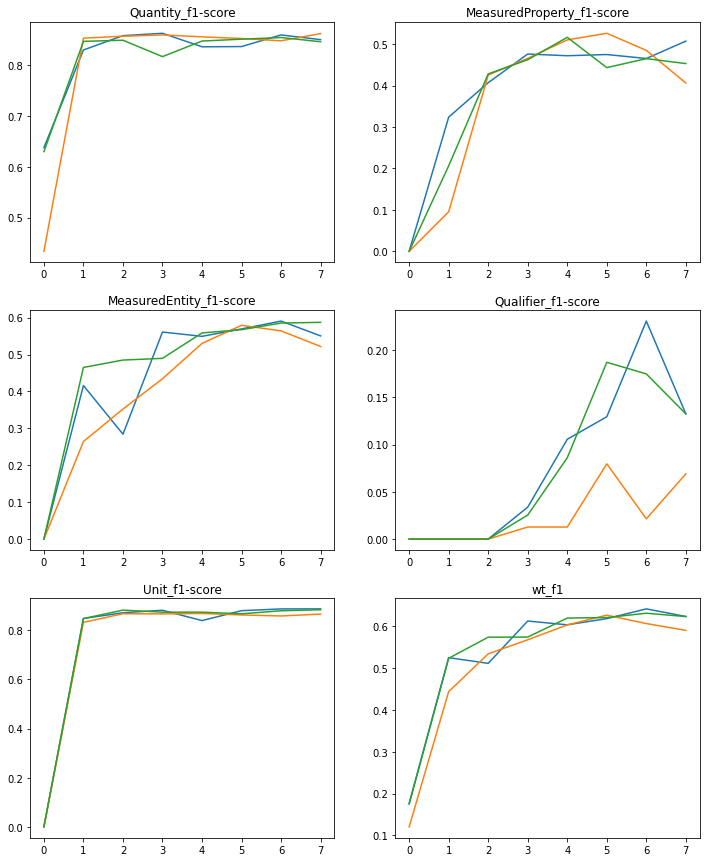

In [8]:
nrows = 3
ncols = 2
fig,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(12,15))

task_f1s = [t+'_f1-score' for t in list(task_map.keys())]

task_f1s.append('wt_f1')

r_ = []
c_ = []
for r in range(nrows):
    for c in range(ncols):
        r_.append(r)
        c_.append(c)
print(r_,c_)

for metric_name, r, c in zip(task_f1s, r_, c_):
    task_scores = test_metrics[['epoch','model',metric_name]]
    for model in set(test_metrics['model'].values):
        label = model
        epoch = task_scores[task_scores['model']==model]['epoch'].values
        metric = task_scores[task_scores['model']==model][metric_name].values
        ax[r,c].plot(epoch,metric,label=label)
        ax[r,c].title.set_text(metric_name)





plt.show()

In [9]:
doc_categories = pd.read_csv(currentdir+'/fileCategories.txt',sep='\t',header=None,names=['doc','category'])

doc_categories = dict(zip(doc_categories['doc'],doc_categories['category']))
# doc_categories

In [10]:
with open('./data/interim/combo_txt.json','r') as f:
    combo_txt = json.load(f)

cat_counts = {}
for doc in combo_txt.keys():
    fulldoc = doc.split('-')[0]
    cat = doc_categories[fulldoc]
    if cat == 'Mathematics': print(f'outlier math doc is {doc}')
    try: cat_counts[cat] += 1
    except: cat_counts[cat] = 1

# return(cat_counts)


print(pd.DataFrame.from_dict(cat_counts,orient='index',columns=['n_doc']))

outlier math doc is S0167278913001450-12425
                   n_doc
Medicine              54
Earth Science         48
Chemistry             49
Astronomy             86
Computer Science      32
Agriculture           38
Materials Science     38
Mathematics            1
Engineering           55
Biology               47


In [11]:
sum(cat_counts.values())

448

In [12]:
def cat_doc_counts(doc_list_path):
    with open(doc_list_path,'r') as f:
        train_docs = json.load(f)

    # print(test_docs)

    cat_counts = {}
    for doc in train_docs:
        fulldoc = doc.split('-')[0]
        cat = doc_categories[fulldoc]
        try: cat_counts[cat] += 1
        except: cat_counts[cat] = 1
    
    # return(cat_counts)


    print(pd.DataFrame.from_dict(cat_counts,orient='index',columns=['n_doc']))

cat_doc_counts('./data/interim/train_docs.json')
cat_doc_counts('./data/interim/dev_docs.json')
cat_doc_counts('./data/interim/test_docs.json')

                   n_doc
Medicine              33
Earth Science         26
Chemistry             21
Astronomy             32
Computer Science      24
Agriculture           24
Materials Science     20
Engineering           32
Biology               36
                  n_doc
Earth Science        14
Chemistry            17
Astronomy            31
Computer Science      2
Medicine              1
                   n_doc
Earth Science          8
Chemistry             11
Astronomy             23
Computer Science       6
Medicine              20
Materials Science     18
Agriculture           14
Mathematics            1
Engineering           23
Biology               11


In [13]:
def cat_doc_counts(preds_labs_path):
    with open(preds_labs_path+'/ytrue_by_doc.json','r') as f:
        ytrue = json.load(f)

    cat_counts = {}
    for doc in ytrue.keys():
        fulldoc = doc.split('-')[0]
        cat = doc_categories[fulldoc]
        try: cat_counts[cat] += 1
        except: cat_counts[cat] = 1
    
    return(cat_counts)

print(pd.DataFrame.from_dict(cat_doc_counts(rb_base_path),orient='index',columns=['n_doc']))

                   n_doc
Earth Science          8
Chemistry             11
Astronomy             23
Computer Science       6
Medicine              20
Materials Science     18
Agriculture           14
Mathematics            1
Engineering           23
Biology               11


In [14]:
def scores_by_category(preds_labs_path):

    with open(preds_labs_path+'/ypred_by_doc.json','r') as f:
        ypred = json.load(f)
    with open(preds_labs_path+'/ytrue_by_doc.json','r') as f:
        ytrue = json.load(f)

    ypred_by_cat = {    
        'Earth Science':[],
        'Biology':[],
        'Chemistry':[],
        'Mathematics':[],
        'Astronomy':[],
        'Materials Science':[],
        'Medicine':[],
        'Engineering':[],
        'Computer Science':[],
        'Agriculture':[]
    }
    ytrue_by_cat = {    
        'Earth Science':[],
        'Biology':[],
        'Chemistry':[],
        'Mathematics':[],
        'Astronomy':[],
        'Materials Science':[],
        'Medicine':[],
        'Engineering':[],
        'Computer Science':[],
        'Agriculture':[]
    }

    for doc in ypred.keys():
        fulldoc = doc.split('-')[0]
        cat = doc_categories[fulldoc]
        ypred_by_cat[cat].extend(ypred[doc])
        ytrue_by_cat[cat].extend(ytrue[doc])

        # print(doc,cat)
        # print(len(ypred_by_cat[cat]))


    scores_by_cat = []
    for cat in set(doc_categories.values()):
        cat_scores = {}
        if cat == 'Mathematics': continue
        cat_report = classification_report(
                    ytrue_by_cat[cat],ypred_by_cat[cat],
                    labels=list(task_map.values()),
                    target_names=list(task_map.keys()),
                    output_dict=True,
                    zero_division=0
                )
        # print(cat_report)
        cat_scores['cat'] = cat
        # print(cat)
        for task, scores in cat_report.items():
            
            # taskname = task.replace(' ','_')
            cat_scores[task.replace(' ','_')+'_f1'] = scores['f1-score']
            cat_scores[task.replace(' ','_')+'_support'] = scores['support']
            # cat_scores['f1'] = scores['f1-score']
            # cat_scores['support'] = scores['support']
        # print(cat_scores)
        scores_by_cat.append(cat_scores)

    return pd.DataFrame.from_dict(scores_by_cat)

rb_base_scores = scores_by_category(rb_base_path)
rb_bio_scores = scores_by_category(rb_bio_path)
rb_cs_scores = scores_by_category(rb_cs_path)




In [15]:
rb_base_scores.columns

Index(['cat', 'Quantity_f1', 'Quantity_support', 'MeasuredProperty_f1',
       'MeasuredProperty_support', 'MeasuredEntity_f1',
       'MeasuredEntity_support', 'Qualifier_f1', 'Qualifier_support',
       'Unit_f1', 'Unit_support', 'micro_avg_f1', 'micro_avg_support',
       'macro_avg_f1', 'macro_avg_support', 'weighted_avg_f1',
       'weighted_avg_support'],
      dtype='object')

<AxesSubplot:title={'center':'Qualifier'}, ylabel='category'>

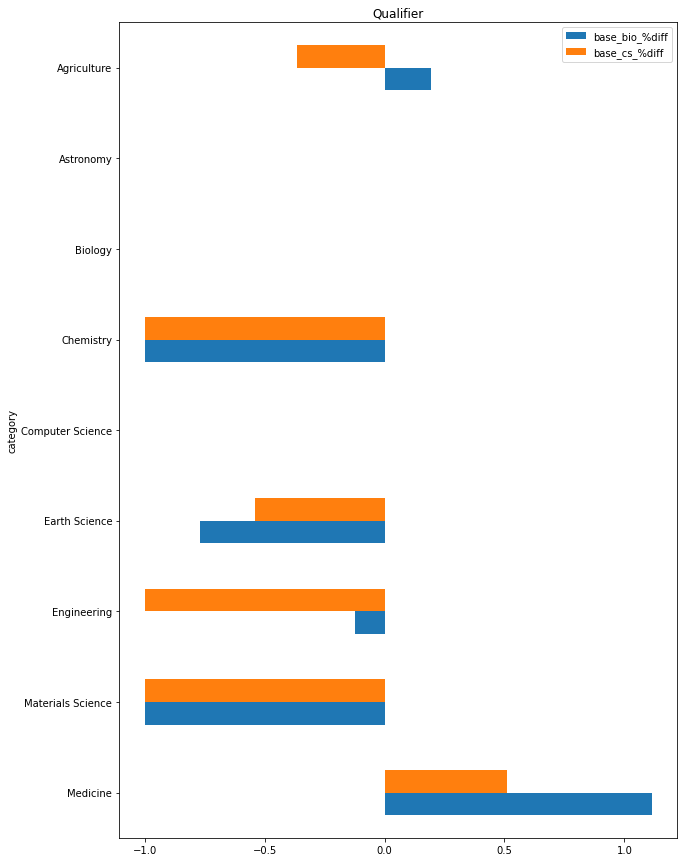

In [16]:
scores_diff = pd.DataFrame()

task = 'Qualifier'

for col in rb_base_scores.columns:
    if col == 'cat' :
        scores_diff['category'] = rb_base_scores[col]
    if col == task+'_f1': 
        scores_diff['base_bio_%diff'] = (rb_bio_scores[col] - rb_base_scores[col]) / rb_base_scores[col]
        scores_diff['base_cs_%diff'] = (rb_cs_scores[col] - rb_base_scores[col]) / rb_base_scores[col]

# for col in rb_base_scores.columns:
#     if col[-2:] == 'f1': 
#         scores_diff['base_cs_%diff'] = (rb_cs_scores[col] - rb_base_scores[col]) / rb_base_scores[col]

scores_diff = scores_diff.set_index('category')
scores_diff.sort_index(inplace=True, ascending=False)
# scores_diff


from matplotlib.pyplot import title, xlabel


scores_diff.plot(kind='barh',figsize=(10,15),title=task)
# plt.figure(figsize=(8, 10))


In [18]:
rb_base_scores['model'] = 'roberta_base'
rb_bio_scores['model'] = 'biomed_roberta_base'
rb_cs_scores['model'] = 'cs_roberta_base'

final_Scores = pd.concat([rb_base_scores,rb_bio_scores,rb_cs_scores])

final_Scores.to_csv('final_scores.csv')

final_Scores



,cat,Quantity_f1,Quantity_support,MeasuredProperty_f1,MeasuredProperty_support,MeasuredEntity_f1,MeasuredEntity_support,Qualifier_f1,Qualifier_support,Unit_f1,Unit_support,micro_avg_f1,micro_avg_support,macro_avg_f1,macro_avg_support,weighted_avg_f1,weighted_avg_support,model
0,Computer Science,0.727273,23,0.369231,45,0.561404,34,0.000000,16,0.818182,10,0.517073,128,0.495218,128,0.473533,128,roberta_base
1,Agriculture,0.833333,143,0.484536,102,0.523179,173,0.197183,54,0.851064,69,0.628514,541,0.577859,541,0.607154,541,roberta_base
2,Materials Science,0.908425,139,0.352273,140,0.592308,134,0.068966,26,0.943396,77,0.686734,516,0.573073,516,0.638359,516,roberta_base
3,Earth Science,0.845070,106,0.453125,66,0.489583,77,0.181818,87,0.852174,52,0.599732,388,0.564354,388,0.560085,388,roberta_base
4,Biology,0.872727,30,0.190476,17,0.740260,92,0.000000,36,0.897959,22,0.636905,197,0.540284,197,0.595324,197,roberta_base
5,Engineering,0.816327,197,0.514286,68,0.521127,181,0.170213,86,0.868132,81,0.653846,613,0.578017,613,0.611858,613,roberta_base
6,Astronomy,0.824940,211,0.540541,156,0.601542,209,0.000000,82,0.897638,121,0.668975,779,0.572932,779,0.632507,779,roberta_base
7,Chemistry,0.831373,139,0.363636,36,0.728111,108,0.296296,23,0.828829,59,0.730769,365,0.609649,365,0.720557,365,roberta_base
8,Medicine,0.895397,123,0.454545,84,0.572668,193,0.192308,47,0.926316,51,0.645355,498,0.608247,498,0.632774,498,roberta_base
0,Computer Science,0.666667,23,0.400000,45,0.711864,34,0.000000,16,0.869565,10,0.563107,128,0.529619,128,0.517440,128,biomed_roberta_base
